In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("/content/drive/MyDrive/employee_attrition_dataset.csv")

In [18]:
df.head()
df.isnull().sum()

,0
EmployeeID,0
Age,0
Gender,0
MaritalStatus,0
Education,0
Department,0
JobRole,0
YearsAtCompany,0
YearsInCurrentRole,0
MonthlyIncome,0


In [19]:
numerical_columns = ['Age', 'YearsAtCompany', 'MonthlyIncome', 'DistanceFromHome']

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

for col in numerical_columns:
  outliers = detect_outliers_iqr(df,col)
  print(outliers)

Empty DataFrame
Columns: [EmployeeID, Age, Gender, MaritalStatus, Education, Department, JobRole, YearsAtCompany, YearsInCurrentRole, MonthlyIncome, JobSatisfaction, WorkLifeBalance, TrainingTimesLastYear, OverTime, DistanceFromHome, Attrition]
Index: []
Empty DataFrame
Columns: [EmployeeID, Age, Gender, MaritalStatus, Education, Department, JobRole, YearsAtCompany, YearsInCurrentRole, MonthlyIncome, JobSatisfaction, WorkLifeBalance, TrainingTimesLastYear, OverTime, DistanceFromHome, Attrition]
Index: []
Empty DataFrame
Columns: [EmployeeID, Age, Gender, MaritalStatus, Education, Department, JobRole, YearsAtCompany, YearsInCurrentRole, MonthlyIncome, JobSatisfaction, WorkLifeBalance, TrainingTimesLastYear, OverTime, DistanceFromHome, Attrition]
Index: []
Empty DataFrame
Columns: [EmployeeID, Age, Gender, MaritalStatus, Education, Department, JobRole, YearsAtCompany, YearsInCurrentRole, MonthlyIncome, JobSatisfaction, WorkLifeBalance, TrainingTimesLastYear, OverTime, DistanceFromHome, A

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# List of categorical columns to be label encoded
categorical_columns = ['Gender', 'MaritalStatus', 'Education', 'Department', 'JobRole', 'OverTime', 'Attrition']

# Apply label encoding
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Display the encoded DataFrame
df.head()


,EmployeeID,Age,Gender,MaritalStatus,Education,Department,JobRole,YearsAtCompany,YearsInCurrentRole,MonthlyIncome,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,OverTime,DistanceFromHome,Attrition
0,1,54,1,2,3,4,0,17,12,19618.16,2,3,3,0,27.77,0
1,2,47,1,1,2,0,4,32,7,7958.49,4,2,9,0,43.56,0
2,3,41,0,1,2,4,2,37,7,10839.85,3,2,2,1,25.76,1
3,4,29,1,0,1,2,2,3,18,14488.44,5,2,4,1,25.11,1
4,5,37,0,0,1,2,1,25,12,9591.07,3,1,7,0,2.87,1


In [21]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Age', 'YearsAtCompany', 'YearsInCurrentRole', 'MonthlyIncome', 'JobSatisfaction', 'WorkLifeBalance', 'TrainingTimesLastYear', 'DistanceFromHome']

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()


,EmployeeID,Age,Gender,MaritalStatus,Education,Department,JobRole,YearsAtCompany,YearsInCurrentRole,MonthlyIncome,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,OverTime,DistanceFromHome,Attrition
0,1,0.886935,1,2,3,4,0,-0.270644,0.375351,1.645854,-0.721711,-0.022397,-0.527039,0,0.148631,0
1,2,0.319343,1,1,2,0,4,1.046315,-0.534723,-0.577295,0.692022,-0.731171,1.570768,0,1.262135,0
2,3,-0.167164,0,1,2,4,2,1.485301,-0.534723,-0.027906,-0.014844,-0.731171,-0.876673,1,0.006887,1
3,4,-1.140178,1,0,1,2,2,-1.499805,1.467439,0.667770,1.398889,-0.731171,-0.177405,1,-0.038951,1
4,5,-0.491502,0,0,1,2,1,0.431734,0.375351,-0.266011,-0.014844,-1.439945,0.871499,0,-1.607306,1


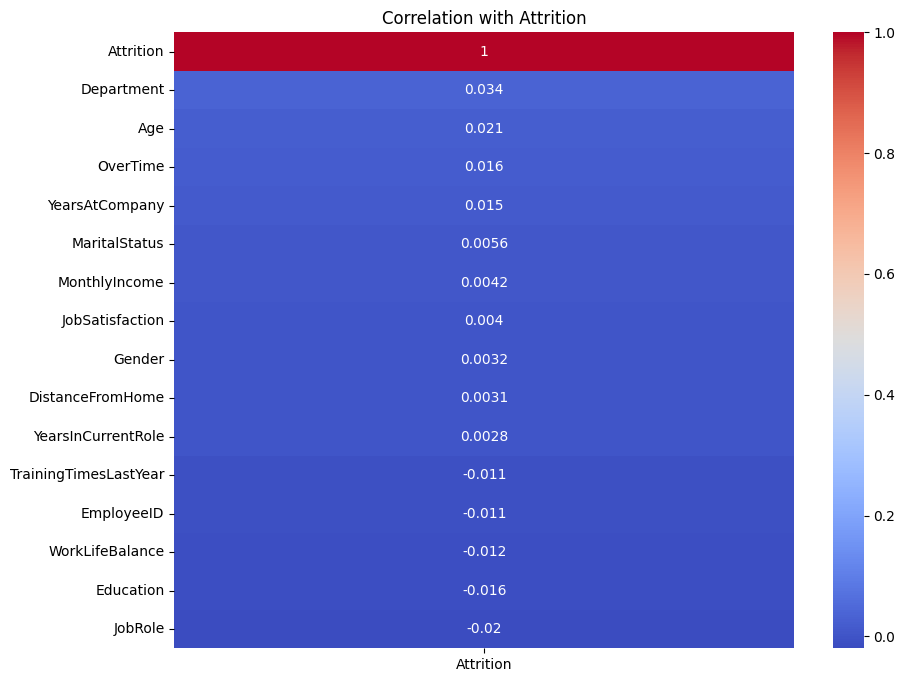

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Attrition')
plt.show()


In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your DataFrame with features and 'Attrition' column
X = df_encoded.drop(['Attrition', 'EmployeeID'], axis=1)
y = df_encoded['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})

# Print feature importances
print(feature_importances)


                    Feature  Importance
0             MonthlyIncome    0.129641
1          DistanceFromHome    0.129487
2                       Age    0.109145
3            YearsAtCompany    0.106134
4        YearsInCurrentRole    0.090449
5     TrainingTimesLastYear    0.076193
6           WorkLifeBalance    0.053186
7           JobSatisfaction    0.052657
8               Gender_Male    0.021780
9              OverTime_Yes    0.021706
10     MaritalStatus_Single    0.018870
11    MaritalStatus_Married    0.018698
12    Education_High School    0.018256
13         Education_Master    0.018042
14            Education_PhD    0.017085
15          JobRole_Manager    0.016192
16  JobRole_Sales Executive    0.015210
17       JobRole_Technician    0.015118
18        JobRole_Developer    0.014753
19         Department_Sales    0.014496
20           Department_R&D    0.014347
21            Department_IT    0.014337
22            Department_HR    0.014218


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['Attrition','EmployeeID'])  # Features
y = df['Attrition']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBClassifier(
    n_estimators=600,      # Number of trees
    learning_rate=0.1,     # Step size shrinkage
    max_depth=10,           # Maximum depth of the trees
    random_state=42
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.536
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       485
           1       0.55      0.54      0.54       515

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000



In [ ]:
import joblib

model.save_model("model.json")
joblib.dump(model, "model.pkl")



['model.pkl']

In [35]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define your model
model = XGBClassifier()
X = df.drop(columns=['Attrition','EmployeeID'])  # Features
y = df['Attrition']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a parameter grid
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}
Best accuracy:  0.5167474402333717
